In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LassoCV
sns.set()
pd.options.display.float_format = '{:.5f}'.format

In [2]:
data=pd.read_csv("heart.csv")

In [4]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60000,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000,303.00000
mean,54.36634,0.68317,0.96700,131.62376,246.26403,0.14851,0.52805,149.64686,0.32673,1.03960,1.39934,0.72937,2.31353,0.54455
std,9.08210,0.46601,1.03205,17.53814,51.83075,0.35620,0.52586,22.90516,0.46979,1.16108,0.61623,1.02261,0.61228,0.49883
min,29.00000,0.00000,0.00000,94.00000,126.00000,0.00000,0.00000,71.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,47.50000,0.00000,0.00000,120.00000,211.00000,0.00000,0.00000,133.50000,0.00000,0.00000,1.00000,0.00000,2.00000,0.00000
50%,55.00000,1.00000,1.00000,130.00000,240.00000,0.00000,1.00000,153.00000,0.00000,0.80000,1.00000,0.00000,2.00000,1.00000
75%,61.00000,1.00000,2.00000,140.00000,274.50000,0.00000,1.00000,166.00000,1.00000,1.60000,2.00000,1.00000,3.00000,1.00000
max,77.00000,1.00000,3.00000,200.00000,564.00000,1.00000,2.00000,202.00000,1.00000,6.20000,2.00000,4.00000,3.00000,1.00000


# Features Selection

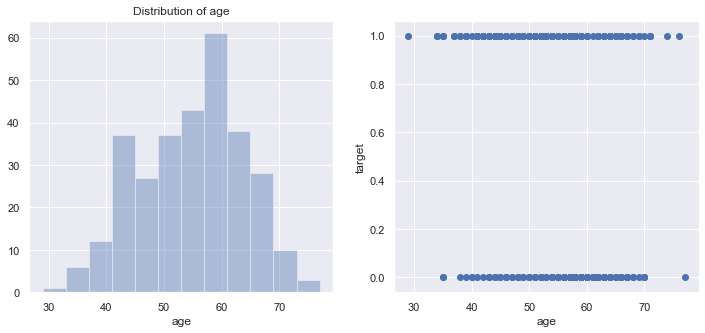

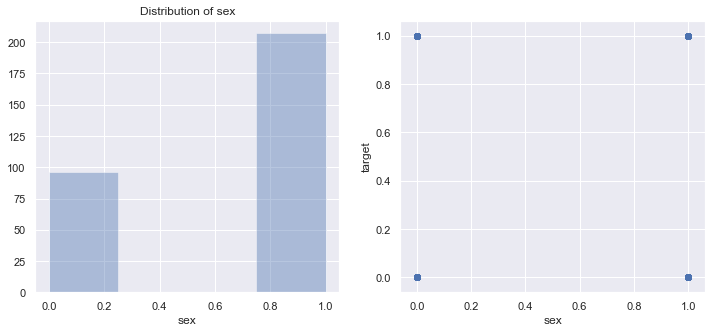

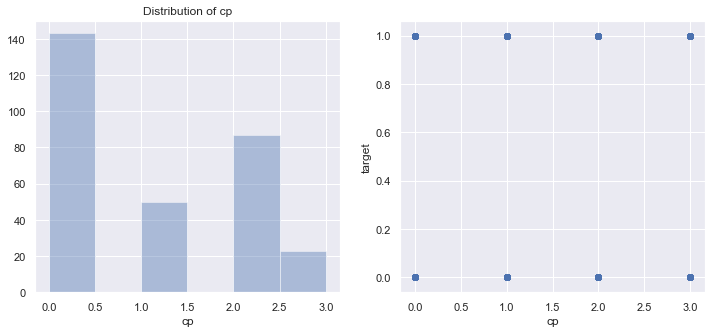

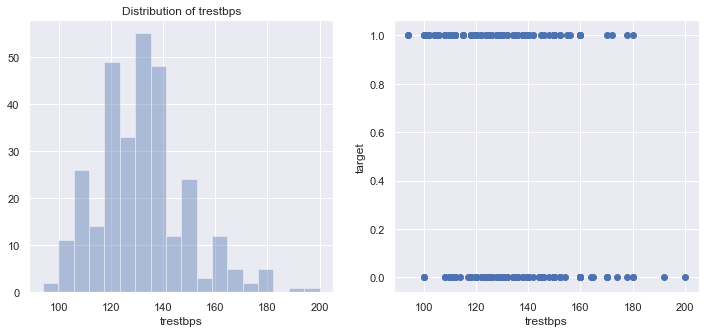

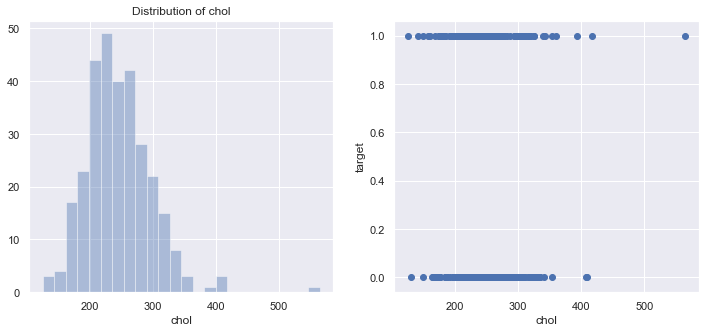

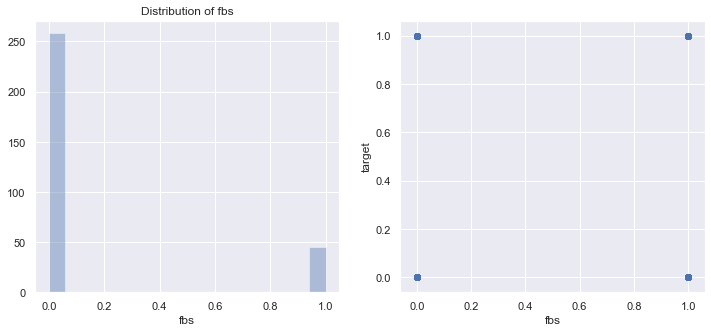

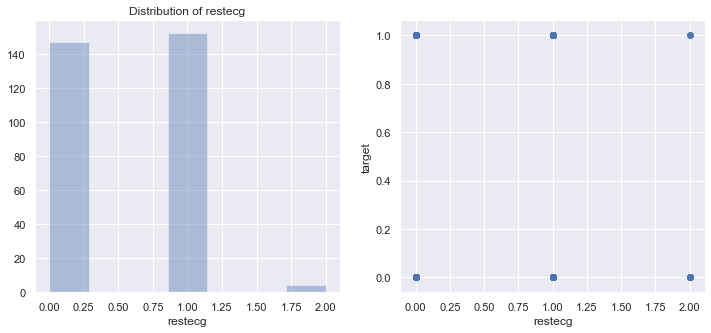

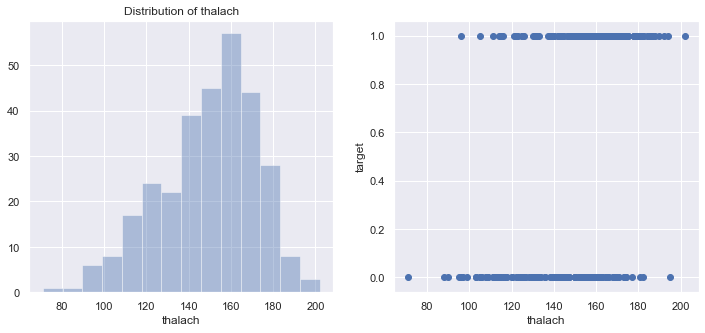

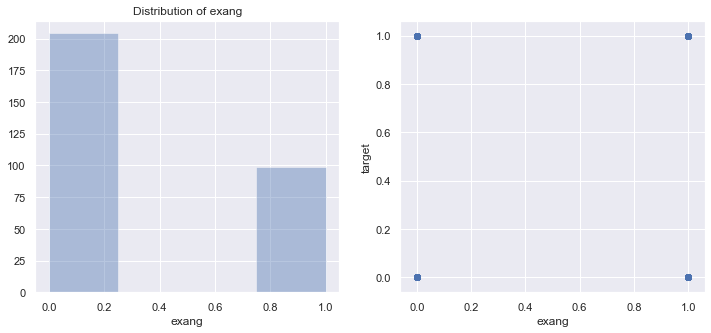

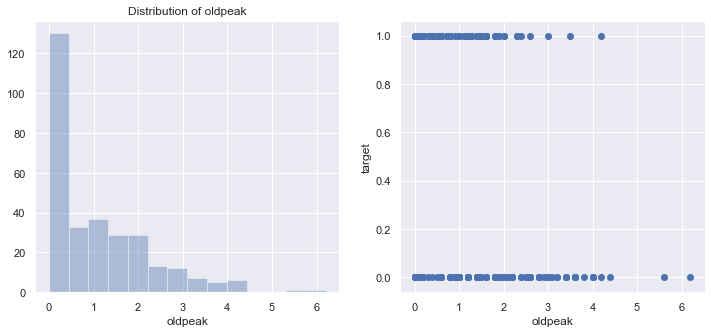

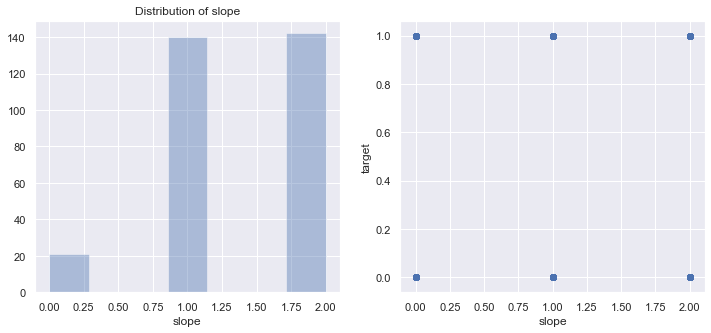

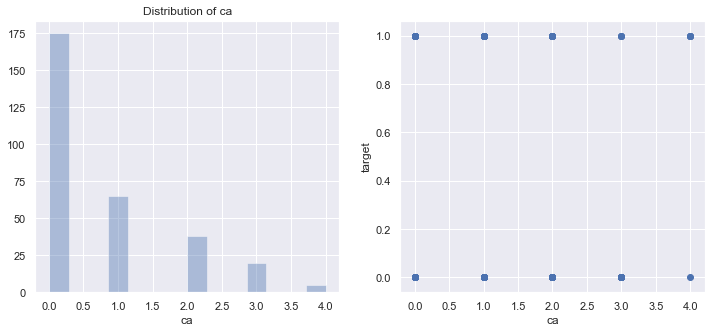

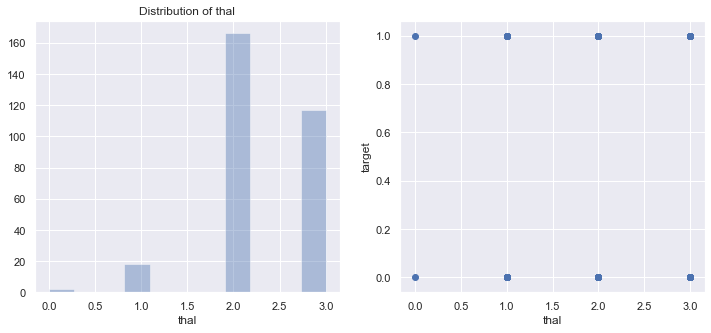

In [7]:
cols=list(data.columns)
cols.remove('target')
for f in cols:
    plt.rcParams['figure.figsize'] = 12, 5
    plt.subplot(1,2,1)
    sns.distplot(data[f],kde=False)
    plt.title(f'Distribution of {f}')
    plt.subplot(1,2,2)
    plt.scatter(data[f],data.target)
    plt.xlabel(f)
    plt.ylabel("target")
    plt.show()
    

In [8]:
categorical=['sex','cp','fbs','restecg','exang','slope','ca','thal']
numerical=['age','trestbps','chol','thalach','oldpeak']

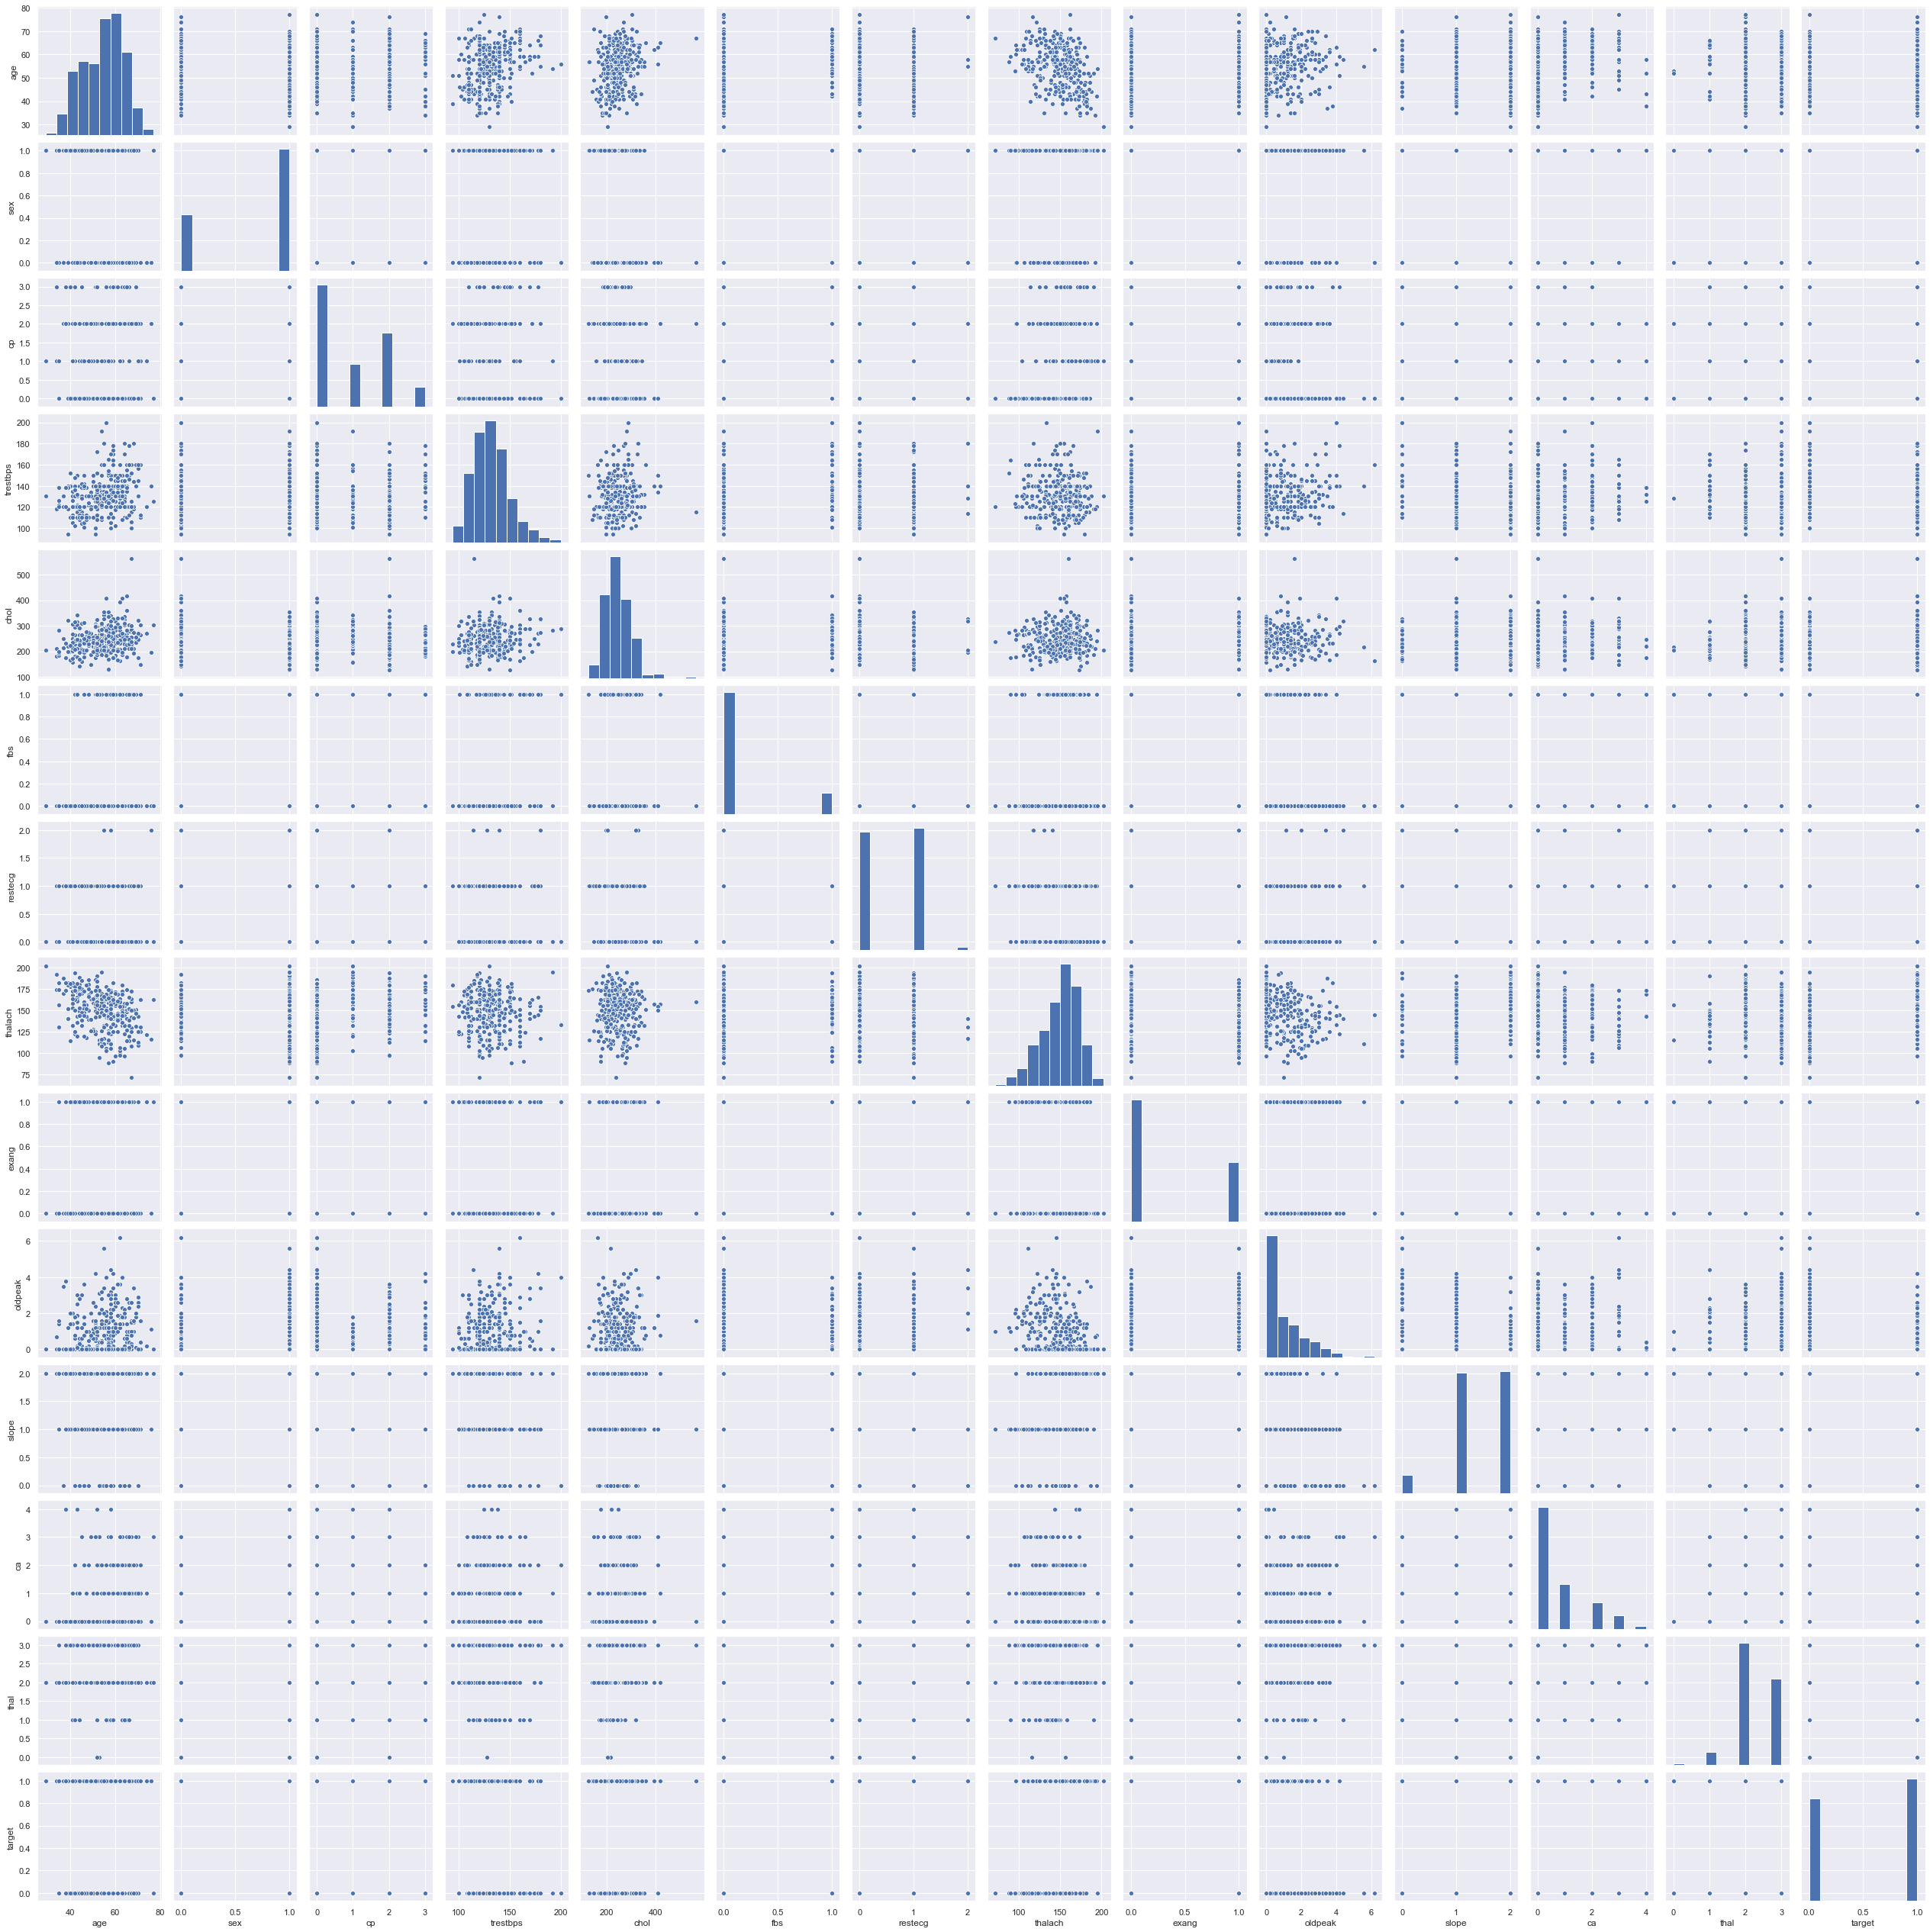

In [9]:
sns.pairplot(data)

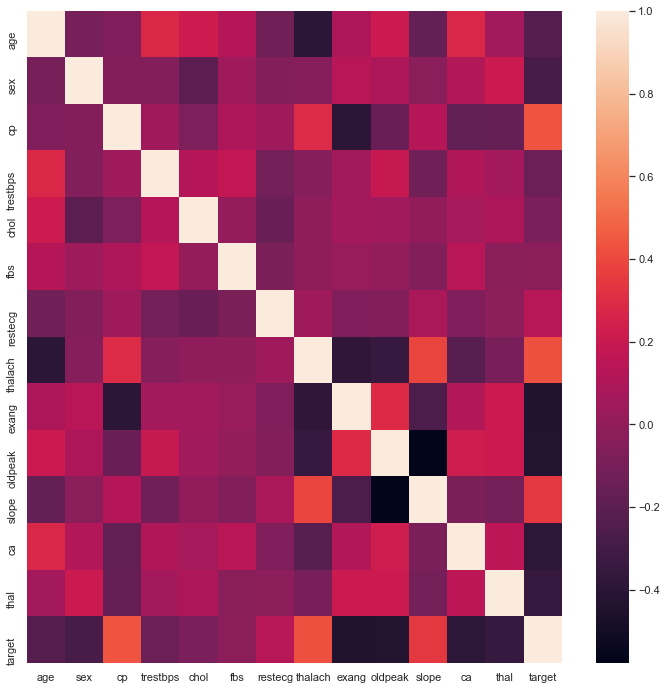

In [10]:
plt.rcParams['figure.figsize'] = 12, 12
sns.heatmap(data.corr())

In [12]:
cols=categorical+numerical
cols

['sex',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca',
 'thal',
 'age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak']

In [13]:
X=data[cols]
Y=data.target
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [14]:
scaler=StandardScaler()
scaler.fit(x_train[numerical])
x_train_numerical=scaler.transform(x_train[numerical])
x_test_numerical=scaler.transform(x_test[numerical])

x_train=x_train[categorical].reset_index(drop=True)
x_train[numerical]=pd.DataFrame(x_train_numerical,columns=numerical)

x_test=x_test[categorical].reset_index(drop=True)
x_test[numerical]=pd.DataFrame(x_test_numerical,columns=numerical)

x_train


,sex,cp,fbs,restecg,exang,slope,ca,thal,age,trestbps,chol,thalach,oldpeak
0,1,0,0,0,0,1,0,3,-0.49780,1.04424,-0.08372,-0.97976,1.39130
1,0,3,0,1,0,2,2,2,1.64737,0.46264,-0.16590,0.04878,0.69330
2,0,1,0,1,0,2,0,2,-0.94942,-1.57297,-0.88505,0.98789,-0.87718
3,1,1,0,0,0,1,0,2,-0.72361,-0.11896,-0.04262,1.34565,-0.70268
4,0,0,0,0,0,2,1,2,0.29252,-0.23528,1.14911,0.40654,-0.87718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1,2,0,1,1,1,0,2,-0.38490,-1.86377,-0.51520,-0.30897,0.16981
238,0,2,0,1,0,1,0,2,-1.17522,-1.39849,-2.17952,1.12205,-0.35368
239,1,2,0,0,1,1,0,3,0.40543,-1.57297,-0.14536,0.18294,-0.35368
240,1,0,0,1,1,1,0,1,-1.40103,0.23000,1.39567,-1.11392,0.69330


In [15]:
from sklearn.feature_selection import f_regression

In [16]:
def select_feature_F(data,columns,target):
    F,P_F=f_regression(data,target)
    
    cols=pd.DataFrame(np.array(columns),columns=['Xi'])
    F=pd.DataFrame(np.array(F),columns=['F Statistic'])
    P_F=pd.DataFrame(np.array(P_F),columns=['P-values {Prob(F Statistic)}'])
   
    df=pd.concat([cols,F,P_F], axis=1)
    
    
    return df.sort_values(by='F Statistic',ascending=False).reset_index(drop=True)

In [17]:
select_feature_F(x_train,cols,y_train)

,Xi,F Statistic,P-values {Prob(F Statistic)}
0,oldpeak,50.11949,0.00000
1,thal,50.06649,0.00000
2,cp,44.46385,0.00000
3,exang,42.14664,0.00000
4,thalach,35.81500,0.00000
5,ca,33.85753,0.00000
6,slope,32.00389,0.00000
7,sex,23.81916,0.00000
8,age,6.15995,0.01375
9,chol,3.60601,0.05877


Some features are not significant according to the F-statistic test (F Statistic > 1 and P-values <= 0.05) => We will try to reduce the number of selected features using the Lasso method

In [18]:
n_alphas = 200
alphas = np.linspace(0.001, 1, n_alphas)
lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17,max_iter=100000)
lasso_cv.fit(x_train, y_train)
sel_feats=[x for i,x in enumerate(cols) if lasso_cv.coef_[i]!=0]
sel_feats

['sex',
 'cp',
 'exang',
 'slope',
 'ca',
 'thal',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak']

In [19]:
lasso_cv.alpha_

0.011040201005025126

In [20]:
lasso_cv.coef_

array([-0.1630459 ,  0.10451926, -0.        ,  0.        , -0.07105146,
        0.06817545, -0.09061318, -0.14702237, -0.        , -0.0192685 ,
       -0.03764656,  0.06081657, -0.07877633])

In [21]:
# Features in important ascending order
[(cols[i],lasso_cv.coef_[i]) for i in np.argsort(np.abs(lasso_cv.coef_))]

[('fbs', -0.0),
 ('restecg', 0.0),
 ('age', -0.0),
 ('trestbps', -0.019268498592016552),
 ('chol', -0.03764655780983956),
 ('thalach', 0.06081656929509003),
 ('slope', 0.06817545061335395),
 ('exang', -0.0710514601496064),
 ('oldpeak', -0.07877632749453034),
 ('ca', -0.09061318236458192),
 ('cp', 0.1045192610077529),
 ('thal', -0.14702237336974258),
 ('sex', -0.163045903918258)]

In [22]:
select_feature_F(x_train[sel_feats],sel_feats,y_train)

,Xi,F Statistic,P-values {Prob(F Statistic)}
0,oldpeak,50.11949,0.00000
1,thal,50.06649,0.00000
2,cp,44.46385,0.00000
3,exang,42.14664,0.00000
4,thalach,35.81500,0.00000
5,ca,33.85753,0.00000
6,slope,32.00389,0.00000
7,sex,23.81916,0.00000
8,chol,3.60601,0.05877
9,trestbps,3.44251,0.06477


We can consider that Lasso selected features are significant according to the F-statistic test (F Statistic > 1  and P-values <= 0.05)

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Testing for auto-collinearity

The **Durbin-Watson** test : 0 <DW<4 where: 2 indicate no autocorrelation , 0<DW<1 cause alarm, 3<DW<4 cause alarm

In [24]:
from statsmodels.stats.stattools import durbin_watson

In [25]:
dw=pd.DataFrame(durbin_watson(x_train[sel_feats]),index=sel_feats,columns=['The Durbin-Watson test statistics'])
dw["Passed"]=dw.apply(lambda row: 'Ok' if row[0]<=3 and row[0]>=1 else "Warning!",axis=1)
dw

,The Durbin-Watson test statistics,Passed
sex,0.71951,Warning!
cp,0.99426,Warning!
exang,1.50649,Ok
slope,0.30570,Warning!
ca,1.27273,Ok
thal,0.13256,Warning!
trestbps,2.26475,Ok
chol,2.02516,Ok
thalach,1.89677,Ok
oldpeak,1.98196,Ok


## Testing for multi-collinearity

using the Variance Inflation Factor: when VIF=1 : no multicollinearity. 1<VIF<5: perfectly ok .  VIF>10 : input Variable must be treated with precaution because of collinearity

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
VIF=pd.DataFrame()
VIF['feature']=sel_feats
VIF['VIF']=[variance_inflation_factor(pd.DataFrame(x_train,columns=cols)[sel_feats].values, i) for i in range(len(sel_feats))]
VIF['Passed']= VIF.apply(lambda row: 'Ok' if row[1]>=1 and row[1]<=5 else 'Warning!!', axis=1)
VIF

,feature,VIF,Passed
0,sex,3.55115,Ok
1,cp,2.18584,Ok
2,exang,1.92611,Ok
3,slope,7.60428,Warning!!
4,ca,1.66196,Ok
5,thal,9.76079,Warning!!
6,trestbps,1.07809,Ok
7,chol,1.08641,Ok
8,thalach,1.28489,Ok
9,oldpeak,1.63189,Ok


**Logistic Regression may be in-appropriate method for this dataset due to the pressence of autocollinearity and multicollinearity**

In [28]:
model=LogisticRegression(random_state=0).fit(x_train, y_train)
y_hat=model.predict(x_test)

In [29]:
print("Mean Training Accuracy = {:.5f}".format(model.score(x_train,y_train)))
print("Mean Testing Accuracy = {:.5f}".format(model.score(x_test,y_test)))

Mean Training Accuracy = 0.86777
Mean Testing Accuracy = 0.83607


In [30]:
y_pred_prob_LR = model.predict_proba(x_test)[:, 1]
fpr_LR, tpr_LR, thresholds_LR = metrics.roc_curve(y_test, y_pred_prob_LR)

In [31]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.76      0.93      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [32]:
auc_LR=metrics.roc_auc_score(y_test, y_pred_prob_LR)
print("Performance of the logistic classifier = {:.2f}".format(auc_LR))

Performance of the logistic classifier = 0.93


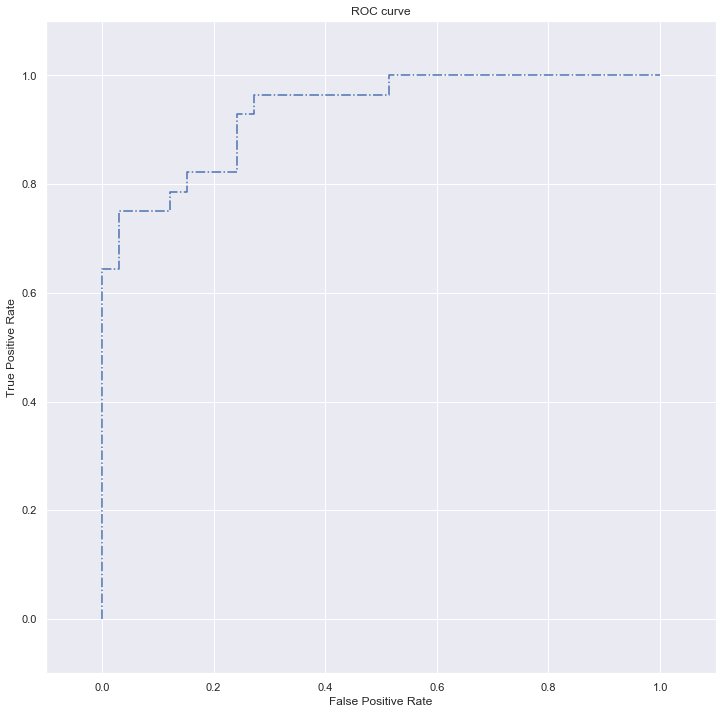

In [33]:
plt.plot(fpr_LR, tpr_LR, '-.', label='AUC LR = %0.2f' % auc_LR)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Logistic Regression with Polynomial features

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly= PolynomialFeatures(degree=2)
cols=[str(x) for x in range(105)]
poly.fit(x_train)
X_train = pd.DataFrame(poly.transform(x_train),columns=cols)
X_test = pd.DataFrame(poly.transform(x_test),columns=cols)
X_train

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,3.00000,-0.49780,...,1.09044,-0.08742,-1.02311,1.45285,0.00701,0.08202,-0.11647,0.95994,-1.36314,1.93571
1,1.00000,0.00000,3.00000,0.00000,1.00000,0.00000,2.00000,2.00000,2.00000,1.64737,...,0.21403,-0.07675,0.02257,0.32075,0.02752,-0.00809,-0.11502,0.00238,0.03382,0.48067
2,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,2.00000,0.00000,2.00000,-0.94942,...,2.47423,1.39216,-1.55393,1.37977,0.78332,-0.87434,0.77635,0.97594,-0.86656,0.76944
3,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,2.00000,-0.72361,...,0.01415,0.00507,-0.16008,0.08359,0.00182,-0.05735,0.02995,1.81078,-0.94556,0.49376
4,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,1.00000,2.00000,0.29252,...,0.05536,-0.27037,-0.09565,0.20639,1.32045,0.46716,-1.00797,0.16528,-0.35661,0.76944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1.00000,1.00000,2.00000,0.00000,1.00000,1.00000,1.00000,0.00000,2.00000,-0.38490,...,3.47363,0.96022,0.57585,-0.31649,0.26544,0.15918,-0.08749,0.09546,-0.05247,0.02884
238,1.00000,0.00000,2.00000,0.00000,1.00000,0.00000,1.00000,0.00000,2.00000,-1.17522,...,1.95577,3.04803,-1.56918,0.49462,4.75030,-2.44553,0.77086,1.25900,-0.39685,0.12509
239,1.00000,1.00000,2.00000,0.00000,0.00000,1.00000,1.00000,0.00000,3.00000,0.40543,...,2.47423,0.22864,-0.28776,0.55633,0.02113,-0.02659,0.05141,0.03347,-0.06470,0.12509
240,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,-1.40103,...,0.05290,0.32100,-0.25620,0.15946,1.94790,-1.55467,0.96763,1.24082,-0.77229,0.48067


In [36]:
n_alphas = 200
alphas = np.linspace(0.000001, 1, n_alphas)
lasso_cv2 = LassoCV(alphas=alphas, 
                   cv=3, random_state=17,max_iter=100000)
lasso_cv2.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-06, 5.02612060e-03, 1.00512412e-02, 1.50763618e-02,
       2.01014824e-02, 2.51266030e-02, 3.01517236e-02, 3.51768442e-02,
       4.02019648e-02, 4.52270854e-02, 5.02522060e-02, 5.52773266e-02,
       6.03024472e-02, 6.53275678e-02, 7.03526884e-02, 7.53778090e-02,
       8.04029296e-02, 8.54280503e-02, 9.04531709e-02, 9.54782915e-02,
       1.00503412e-01, 1.05528533e-0...
       9.44723673e-01, 9.49748794e-01, 9.54773915e-01, 9.59799035e-01,
       9.64824156e-01, 9.69849276e-01, 9.74874397e-01, 9.79899518e-01,
       9.84924638e-01, 9.89949759e-01, 9.94974879e-01, 1.00000000e+00]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=100000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)

In [37]:
lasso_cv2.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.05088729, -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.04462289, -0.        ,
       -0.        , -0.00026031,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.01146541, -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.03

In [38]:
sel_feats2=[str(i) for i in range(105) if lasso_cv2.coef_[i]!=0]
print(f'{len(sel_feats2)} features are selected from a total of 105 features')

16 features are selected from a total of 105 features


In [39]:
model2=LogisticRegression(random_state=0).fit(X_train[sel_feats2], y_train)
y_hat2=model2.predict(X_test[sel_feats2])
print("Mean Training Accuracy = {:.5f}".format(model2.score(X_train[sel_feats2],y_train)))
print("Mean Testing Accuracy = {:.5f}".format(model2.score(X_test[sel_feats2],y_test)))
print("Model has overfitted")

Mean Training Accuracy = 0.85950
Mean Testing Accuracy = 0.77049
Model has overfitted


# Creating a model using Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
tree_params = {'max_depth': range(3,10),
               'max_features': range(0,len(cols)),
               'max_leaf_nodes': range(5,10),
               'min_samples_leaf': range(2,7)}

tree_grid = GridSearchCV(DecisionTreeClassifier(criterion='gini', random_state=17), tree_params,
                         cv=3, n_jobs=-1, verbose=True)

tree_grid.fit(x_train[sel_feats], y_train)

Fitting 3 folds for each of 18375 candidates, totalling 55125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 5128 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 21128 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 43528 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 55125 out of 55125 | elapsed:   29.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 10),
                         'max_

In [42]:
tree_grid.best_params_

{'max_depth': 4, 'max_features': 2, 'max_leaf_nodes': 8, 'min_samples_leaf': 6}

In [43]:
tree_grid.best_score_

0.8221707818930041

## Plot the tree

In [44]:
import graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
from sklearn import tree

/home/hichem/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



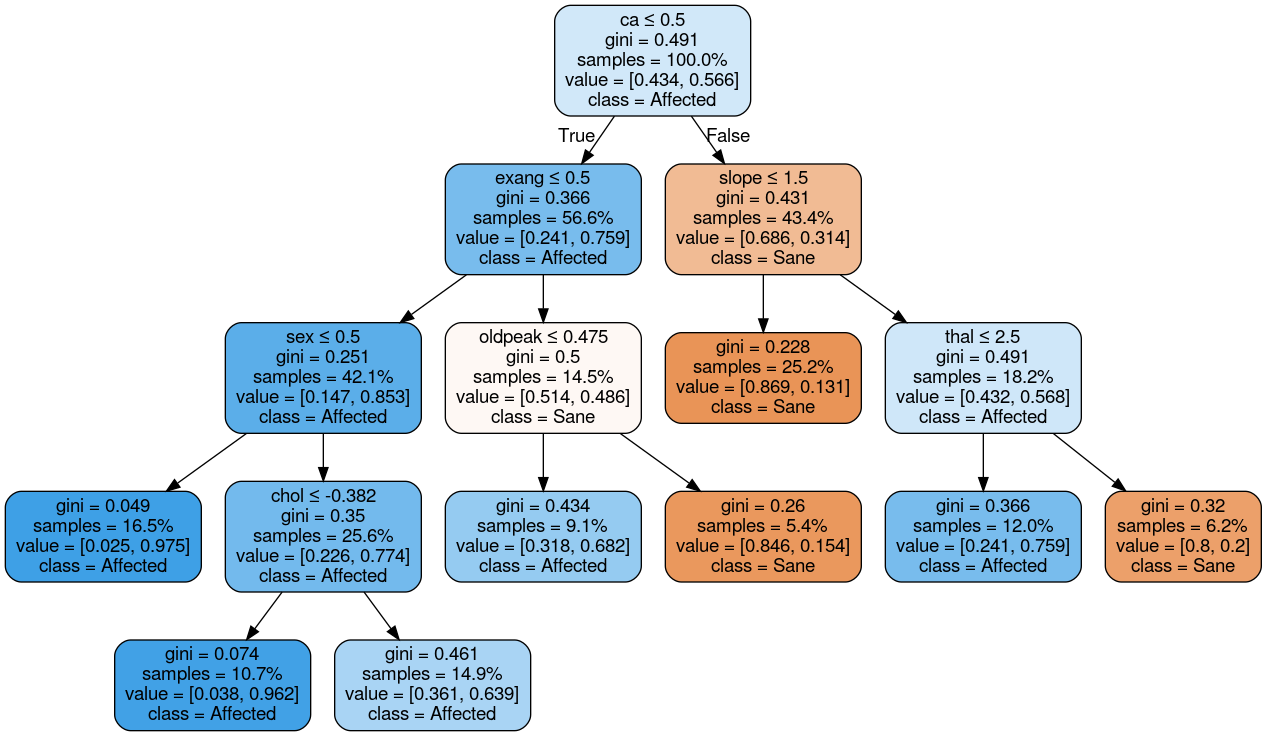

In [45]:
dot_data = StringIO()
tree.export_graphviz(tree_grid.best_estimator_, out_file=dot_data, label='all',proportion=True, 
                filled=True, rounded=True, feature_names=sel_feats,class_names=["Sane","Affected"],
                special_characters=True)
graph = graphviz.Source(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [46]:
clf=RandomForestClassifier(**tree_grid.best_params_)
clf.fit(x_train[sel_feats],y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=2,
                       max_leaf_nodes=8, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
print(f'Mean Training Accuracy Score: {clf.score(x_train[sel_feats],y_train):.5f}')
print(f'Test Training Accuracy Score: {clf.score(x_test[sel_feats],y_test):.5f}')

Mean Training Accuracy Score: 0.87603
Test Training Accuracy Score: 0.85246


In [48]:
print(metrics.classification_report(y_test,clf.predict(x_test[sel_feats])))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        33
           1       0.77      0.96      0.86        28

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



In [49]:
y_pred_prob_RF=clf.predict_proba(x_test[sel_feats])[:, 1]
print("Performance of the Random Forest classifier = {:.3f}".format(metrics.roc_auc_score(y_test, y_pred_prob_RF)))

Performance of the Random Forest classifier = 0.969


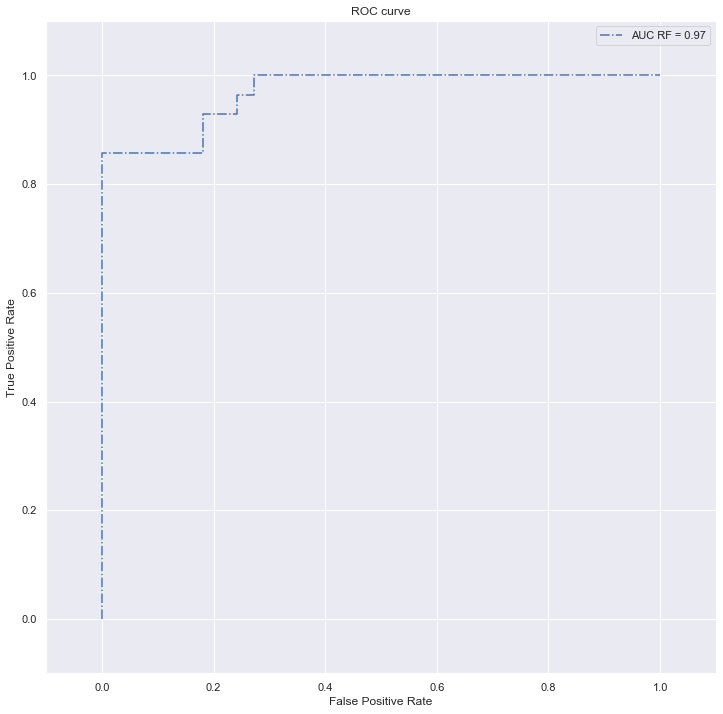

In [50]:
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(y_test, y_pred_prob_RF)
auc_RF=metrics.roc_auc_score(y_test, y_pred_prob_RF)

plt.plot(fpr_RF, tpr_RF, '-.', label='AUC RF = %0.2f' % auc_RF)

plt.legend()

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Creating a model using KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
grid_params= {
    'n_neighbors' : range(1,5),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']    
}
gs= GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 3,
    verbose = True,
    n_jobs= -1
)
gs.fit(x_train[sel_feats],y_train)
gs.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.1s finished


{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

In [53]:
neigh = KNeighborsClassifier(**gs.best_params_)
neigh.fit(x_train[sel_feats], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [54]:
y_pred_proba_KNN = neigh.predict_proba(x_test[sel_feats])
fpr_KNN, tpr_KNN, thresholds_KNN = metrics.roc_curve(y_test, y_pred_proba_KNN[:, 1])
print("Mean Testing Accuracy = {:.5f}".format(neigh.score(x_test[sel_feats],y_test)))

Mean Testing Accuracy = 0.86885


In [55]:
print(metrics.classification_report(y_test,neigh.predict(x_test[sel_feats])))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



In [56]:
auc_KNN=metrics.roc_auc_score(y_test, y_pred_proba_KNN[:, 1])
print("Performance of the KNN classifier = {:.2f}".format(auc_KNN))

Performance of the KNN classifier = 0.94


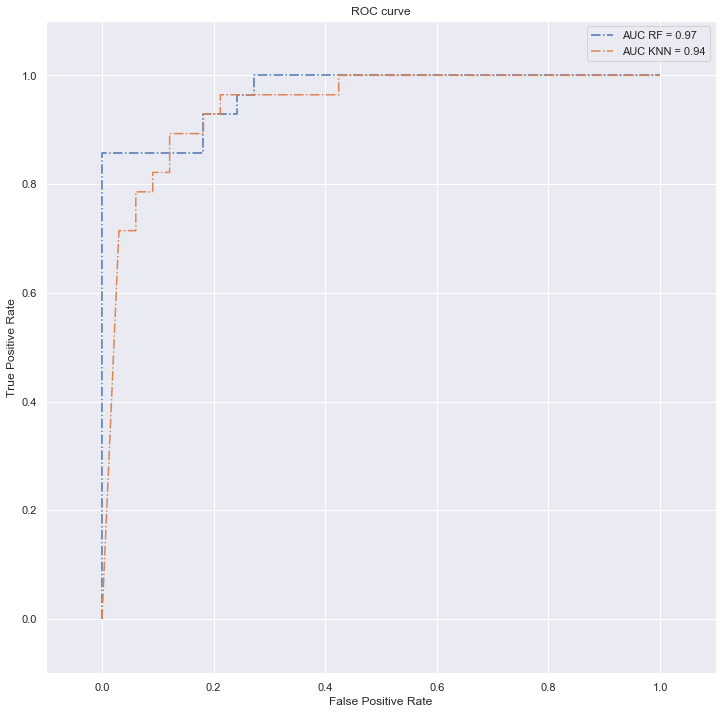

In [57]:
plt.plot(fpr_RF, tpr_RF, '-.',label='AUC RF = %0.2f' % auc_RF)
plt.plot(fpr_KNN, tpr_KNN, '-.',label='AUC KNN = %0.2f' % auc_KNN)
plt.legend()
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Creating a model using SVC

In [58]:
from sklearn.svm import SVC

In [59]:
grid_params= {
    'C' : np.linspace(0,1,50),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1,2,3]
}
gs= GridSearchCV(
    SVC(gamma='auto'),
    grid_params,
    cv = 3,
    verbose = True,
    n_jobs= -1
)
gs.fit(x_train[sel_feats],y_train)
gs.best_params_

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    1.5s finished


{'C': 0.14285714285714285, 'degree': 1, 'kernel': 'linear'}

In [60]:
svclf=SVC(gamma='auto',probability=True,**gs.best_params_)

In [61]:
svclf.fit(x_train[sel_feats],y_train)

SVC(C=0.14285714285714285, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=1, gamma='auto',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [62]:
print(f'Mean Training Accuracy Score: {svclf.score(x_train[sel_feats],y_train):.5f}')
print(f'Test Training Accuracy Score: {svclf.score(x_test[sel_feats],y_test):.5f}')

Mean Training Accuracy Score: 0.85537
Test Training Accuracy Score: 0.81967


In [63]:
print(metrics.classification_report(y_test,svclf.predict(x_test[sel_feats])))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.74      0.93      0.83        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61



In [64]:
y_pred_prob_SVC=svclf.predict_proba(x_test[sel_feats])[:, 1]
auc_SVC=metrics.roc_auc_score(y_test, y_pred_prob_SVC)
fpr_SVC, tpr_SVC, thresholds_SVC = metrics.roc_curve(y_test, y_pred_prob_SVC)
print("Performance of the Random Forest classifier = {:.3f}".format(auc_SVC))

Performance of the Random Forest classifier = 0.934


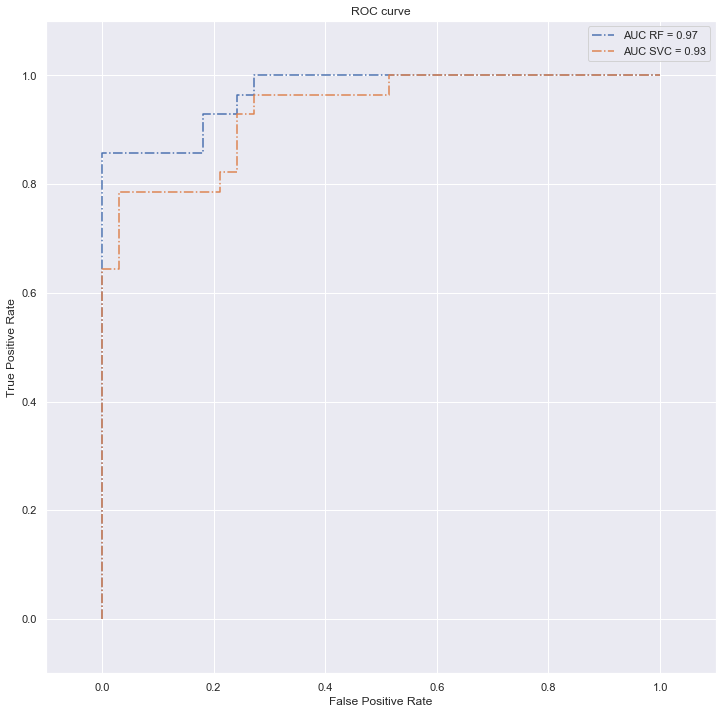

In [65]:

plt.plot(fpr_RF, tpr_RF, '-.',label='AUC RF = %0.2f' % auc_RF)
plt.plot(fpr_SVC, tpr_SVC, '-.',label='AUC SVC = %0.2f' % auc_SVC)
plt.legend()
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## Boosting
### Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

**First gs trail results :**

{'criterion': 'friedman_mse',
 'learning_rate': 0.075,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.28181818181818186,
 'min_samples_split': 0.1,
 'n_estimators': 100,
 'subsample': 0.85}
 
 **Second gs trail results :**
 
 
 {'criterion': 'friedman_mse',
 'learning_rate': 0.075,
 'loss': 'exponential',
 'max_depth': 1,
 'max_features': 'log2',
 'min_samples_leaf': 0.29090909090909095,
 'min_samples_split': 0.01,
 'n_estimators': 100,
 'subsample': 0.87}
 
 **Third gs trail result**
 
 {'criterion': 'friedman_mse',
 'learning_rate': 0.075,
 'loss': 'deviance',
 'max_depth': 1,
 'max_features': 'log2',
 'min_samples_leaf': 0.29,
 'min_samples_split': 0.001,
 'n_estimators': 100,
 'subsample': 0.87}

In [67]:
grid_params = {
    "loss":["deviance","exponential"],
    "learning_rate": [0.075],
    "min_samples_split": np.linspace(0, 0.01, 200),
    "min_samples_leaf": [0.29],
    "max_depth": [1],
    "max_features":["log2"],
    "criterion": ["friedman_mse"],
    "subsample":[ 0.85, 0.86, 0.87, 0.88],
    "n_estimators":[100]
    }


gs= GridSearchCV(
    GradientBoostingClassifier(random_state=0),
    grid_params,
    cv = 3,
    verbose = True,
    n_jobs= -1
)
gs.fit(x_train[sel_feats],y_train)
gs.best_params_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:   41.6s finished


{'criterion': 'friedman_mse',
 'learning_rate': 0.075,
 'loss': 'deviance',
 'max_depth': 1,
 'max_features': 'log2',
 'min_samples_leaf': 0.29,
 'min_samples_split': 5.0251256281407036e-05,
 'n_estimators': 100,
 'subsample': 0.87}

In [68]:
gbclf = GradientBoostingClassifier(random_state=0,**gs.best_params_)

In [69]:
gbclf.fit(x_train[sel_feats],y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.075, loss='deviance', max_depth=1,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.29,
                           min_samples_split=5.0251256281407036e-05,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=0.87, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [70]:
print(f'Mean Training Accuracy Score: {gbclf.score(x_train[sel_feats],y_train):.5f}')
print(f'Test Training Accuracy Score: {gbclf.score(x_test[sel_feats],y_test):.5f}')

Mean Training Accuracy Score: 0.88017
Test Training Accuracy Score: 0.86885


In [71]:
print(metrics.classification_report(y_test,gbclf.predict(x_test[sel_feats])))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



In [72]:
y_pred_prob_GB=gbclf.predict_proba(x_test[sel_feats])[:, 1]
auc_GB=metrics.roc_auc_score(y_test, y_pred_prob_GB)
fpr_GB, tpr_GB, thresholds_GB = metrics.roc_curve(y_test, y_pred_prob_GB)
print("Performance of the Random Forest classifier = {:.3f}".format(auc_GB))

Performance of the Random Forest classifier = 0.946


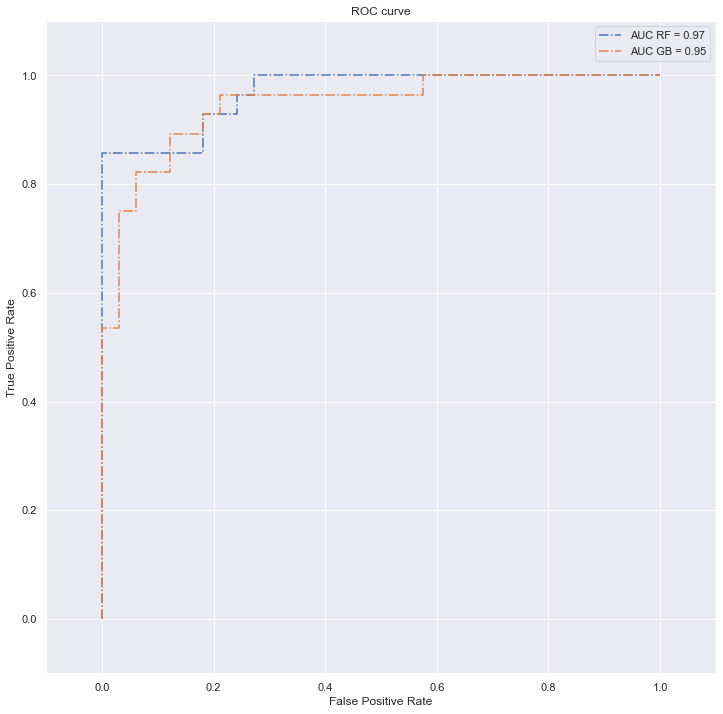

In [73]:
plt.plot(fpr_RF, tpr_RF, '-.',label='AUC RF = %0.2f' % auc_RF)
plt.plot(fpr_GB, tpr_GB, '-.',label='AUC GB = %0.2f' % auc_GB)
plt.legend()
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### XGBoosting

In [74]:
import xgboost as xgb

In [76]:
grid_params = {
    "learning_rate": np.linspace(0, 0.01, 10),
    "booster": ["gbtree", "gblinear" , "dart"],
    "gamma": np.linspace(0, 0.01, 10),
    "reg_alpha": np.linspace(0, 0.01, 10),
    "reg_lambda": np.linspace(0, 0.01, 10)
    }


gs= GridSearchCV(
    xgb.sklearn.XGBClassifier(random_state=0),
    grid_params,
    cv = 3,
    verbose = True,
    n_jobs= -1
)
gs.fit(x_train[sel_feats],y_train)
gs.best_params_

Fitting 3 folds for each of 30000 candidates, totalling 90000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 5776 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 9376 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 13776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 18976 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 24976 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 35792 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 61392 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 65592 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 70192 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 75192 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 80592 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 86392 t

{'booster': 'gblinear',
 'gamma': 0.0,
 'learning_rate': 0.008888888888888889,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0}

In [77]:
xgbclf=xgb.sklearn.XGBClassifier(random_state=0,**gs.best_params_)

In [78]:
xgbclf.fit(x_train[sel_feats],y_train)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=0.0,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.008888888888888889, max_delta_step=None,
              max_depth=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=None, objective='binary:logistic',
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, scale_pos_weight=1,
              subsample=None, tree_method=None, validate_parameters=False,
              verbosity=None)

In [79]:
print(f'Mean Training Accuracy Score: {xgbclf.score(x_train[sel_feats],y_train):.5f}')
print(f'Test Training Accuracy Score: {xgbclf.score(x_test[sel_feats],y_test):.5f}')

Mean Training Accuracy Score: 0.81405
Test Training Accuracy Score: 0.85246


In [80]:
print(metrics.classification_report(y_test,xgbclf.predict(x_test[sel_feats])))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [81]:
y_pred_prob_XGB=xgbclf.predict_proba(x_test[sel_feats])[:, 1]
auc_XGB=metrics.roc_auc_score(y_test, y_pred_prob_XGB)
fpr_XGB, tpr_XGB, thresholds_XGB = metrics.roc_curve(y_test, y_pred_prob_XGB)
print("Performance of the Random Forest classifier = {:.3f}".format(auc_XGB))

Performance of the Random Forest classifier = 0.946


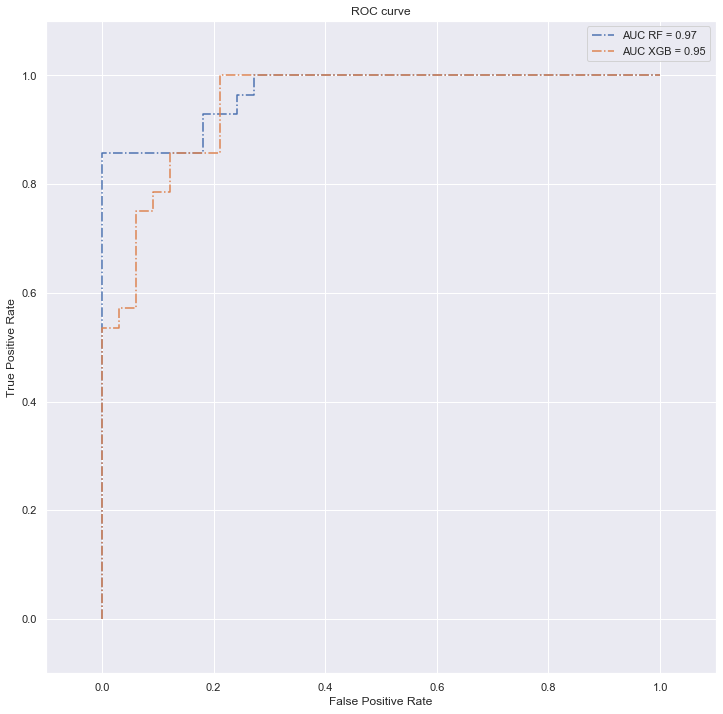

In [82]:
plt.plot(fpr_RF, tpr_RF, '-.',label='AUC RF = %0.2f' % auc_RF)
plt.plot(fpr_XGB, tpr_XGB, '-.',label='AUC XGB = %0.2f' % auc_XGB)
plt.legend()
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## AdaBoost

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [96]:
RFbase=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=2,
                       max_leaf_nodes=8, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
grid_params = {
    "learning_rate": np.linspace(0, 0.01, 10),
    "algorithm" : ['SAMME', 'SAMME.R'],
    }


gs= GridSearchCV(
    AdaBoostClassifier(n_estimators=100, random_state=0,base_estimator=RFbase),
    grid_params,
    cv = 3,
    verbose = True,
    n_jobs= -1
)
gs.fit(x_train[sel_feats],y_train)
gs.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.5min finished


{'algorithm': 'SAMME', 'learning_rate': 0.0077777777777777776}

In [112]:
adaclf = AdaBoostClassifier(n_estimators=100, random_state=0,base_estimator=RFbase)

In [113]:
adaclf.fit(x_train[sel_feats],y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=2,
                                                         max_leaf_nodes=8,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=6,
                                                         min_samples_split=2,
                                                  

In [114]:
print(f'Mean Training Accuracy Score: {adaclf.score(x_train[sel_feats],y_train):.5f}')
print(f'Test Training Accuracy Score: {adaclf.score(x_test[sel_feats],y_test):.5f}')

Mean Training Accuracy Score: 1.00000
Test Training Accuracy Score: 0.81967


In [115]:
print(metrics.classification_report(y_test,adaclf.predict(x_test[sel_feats])))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.74      0.93      0.83        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61



In [116]:
y_pred_prob_ADA=adaclf.predict_proba(x_test[sel_feats])[:, 1]
auc_ADA=metrics.roc_auc_score(y_test, y_pred_prob_ADA)
fpr_ADA, tpr_ADA, thresholds_ADA = metrics.roc_curve(y_test, y_pred_prob_ADA)
print("Performance of the Random Forest classifier = {:.3f}".format(auc_ADA))

Performance of the Random Forest classifier = 0.923


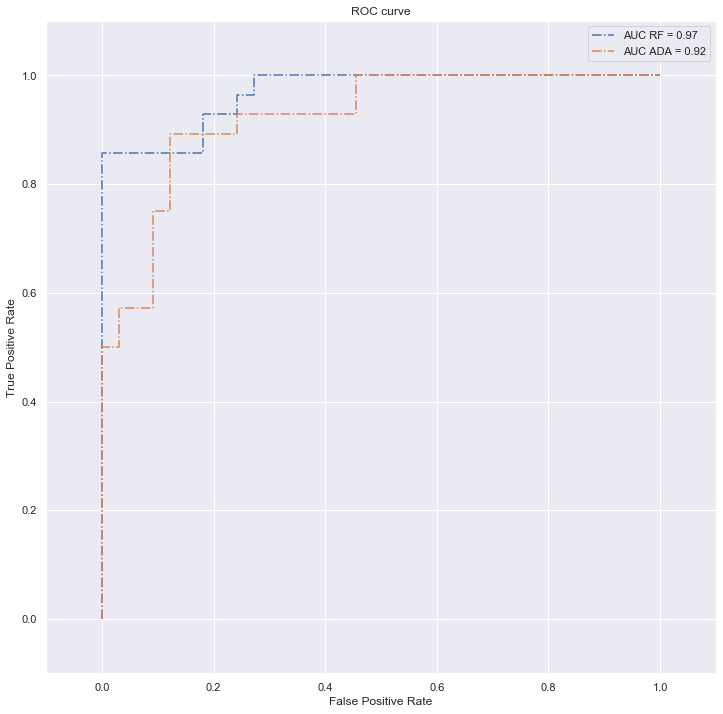

In [117]:
plt.plot(fpr_RF, tpr_RF, '-.',label='AUC RF = %0.2f' % auc_RF)
plt.plot(fpr_ADA, tpr_ADA, '-.',label='AUC ADA = %0.2f' % auc_ADA)
plt.legend()
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### The selected model is RandomForest with parameters :{'max_depth': 4, 'max_features': 2, 'max_leaf_nodes': 8, 'min_samples_leaf': 6}